# MLP on the MNIST Dataset

Trains four simple NNs with 10 hidden layers on the MNIST dataset. (5 runs, seed = 10, 20, 30, 40, 50)

1. 784-800 (10 times)-10 (Fully Connected; MSE; lr = 0.01)

~1 seconds per epoch on 4 GTX1080 Ti GPU, ~2 seconds per epoch on a GTX1070 GPU.

## Import Tensorflow package (for Keras) and Reproducibility

In [1]:
import numpy as np
import tensorflow as tf
import random as rn
import matplotlib.pyplot as plt

import os
os.environ['PYTHONHASHSEED'] = '0'

seed = 10

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.

np.random.seed(seed)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.

rn.seed(seed)

session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=4)

# from keras import backend as K

# The below tf.set_random_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed

tf.set_random_seed(seed)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
tf.keras.backend.set_session(sess)

## Import the MNIST dataset

In [2]:
batch_size = 512
num_classes = 10
epochs = 30

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## Data Transformation

In [3]:
x_train = x_train.reshape((60000, 784), order='F') # reshaping order fixed to the same as BCD
x_test = x_test.reshape((10000, 784), order='F') # reshaping order fixed to the same as BCD
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# MLP

## Model Setup

Input -> 9 Fully Connected (600) + ReLU -> Fully Connected (10) -> Squared loss

In [4]:
hidden_dim = 600

# model 1 (SGD)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(hidden_dim, input_shape=(784,), activation='relu', use_bias=True, 
                                                          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                                          bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model.add(tf.keras.layers.Dense(num_classes, activation=None, use_bias=True, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                bias_initializer=tf.keras.initializers.Constant(value=0.1)))

### SGD Optimizer

In [5]:
sgd = tf.keras.optimizers.SGD(lr=0.001, decay=0, momentum=0, nesterov=False)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 600)               471000    
_________________________________________________________________
dense_1 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_2 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_3 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_4 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_5 (Dense)              (None, 600)               360600    
_________________________________________________________________
dense_6 (Dense)              (None, 600)               360600    
__________

In [6]:
# model 2 (Adam)
model_2 = tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(hidden_dim, input_shape=(784,), activation='relu', use_bias=True, 
                                                          kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                                          bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(hidden_dim, activation='relu', use_bias=True, 
                                        kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                                        bias_initializer=tf.keras.initializers.Constant(value=0.1)))
model_2.add(tf.keras.layers.Dense(num_classes, activation=None, use_bias=True, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=seed), 
                bias_initializer=tf.keras.initializers.Constant(value=0.1)))

### Adam Optimizer

In [7]:
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model_2.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_12 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_13 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_14 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_15 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_16 (Dense)             (None, 600)               360600    
_________________________________________________________________
dense_17 (Dense)             (None, 600)               360600    
__________

## Fit the Model using Back Propagation (Vanilla SGD)

### SGD

In [8]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    shuffle=False)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.0906 - acc: 0.0903 - val_loss: 0.0905 - val_acc: 0.0892
Epoch 2/30
 - 1s - loss: 0.0904 - acc: 0.0903 - val_loss: 0.0903 - val_acc: 0.0892
Epoch 3/30
 - 1s - loss: 0.0902 - acc: 0.0903 - val_loss: 0.0902 - val_acc: 0.0892
Epoch 4/30
 - 1s - loss: 0.0902 - acc: 0.0943 - val_loss: 0.0901 - val_acc: 0.0958
Epoch 5/30
 - 1s - loss: 0.0901 - acc: 0.0986 - val_loss: 0.0901 - val_acc: 0.0958
Epoch 6/30
 - 1s - loss: 0.0901 - acc: 0.0986 - val_loss: 0.0901 - val_acc: 0.0958
Epoch 7/30
 - 1s - loss: 0.0900 - acc: 0.0993 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 8/30
 - 1s - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 9/30
 - 1s - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 10/30
 - 1s - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 11/30
 - 1s - loss: 0.0900 - acc: 0.1124 - val_loss: 0.0900 - val_acc: 0.1135
Epoch 12/30
 - 1s - loss: 0.0900 - 

### Adam

In [9]:
history_2 = model_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_test, y_test),
                    shuffle=False)
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 2s - loss: 0.0903 - acc: 0.1043 - val_loss: 0.0901 - val_acc: 0.1010
Epoch 2/30
 - 1s - loss: 0.0901 - acc: 0.1064 - val_loss: 0.0900 - val_acc: 0.1028
Epoch 3/30
 - 1s - loss: 0.0890 - acc: 0.1336 - val_loss: 0.0816 - val_acc: 0.2072
Epoch 4/30
 - 1s - loss: 0.0705 - acc: 0.3586 - val_loss: 0.0632 - val_acc: 0.4510
Epoch 5/30
 - 1s - loss: 0.0521 - acc: 0.5492 - val_loss: 0.0478 - val_acc: 0.5870
Epoch 6/30
 - 1s - loss: 0.0437 - acc: 0.6377 - val_loss: 0.0387 - val_acc: 0.6745
Epoch 7/30
 - 1s - loss: 0.0306 - acc: 0.7728 - val_loss: 0.0228 - val_acc: 0.8454
Epoch 8/30
 - 1s - loss: 0.0188 - acc: 0.9009 - val_loss: 0.0144 - val_acc: 0.9184
Epoch 9/30
 - 1s - loss: 0.0112 - acc: 0.9385 - val_loss: 0.0106 - val_acc: 0.9409
Epoch 10/30
 - 1s - loss: 0.0091 - acc: 0.9480 - val_loss: 0.0102 - val_acc: 0.9420
Epoch 11/30
 - 1s - loss: 0.0081 - acc: 0.9528 - val_loss: 0.0078 - val_acc: 0.9538
Epoch 12/30
 - 1s - loss: 0.0063 - 

## Loss and Accuracy Plots

### SGD

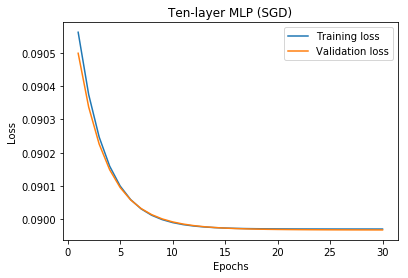

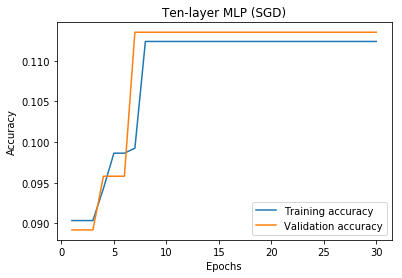

In [10]:
# Plot of Losses
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs_index = range(1,len(loss_values)+1)
fig_loss = plt.figure()
plt.plot(epochs_index, loss_values, label='Training loss')
plt.plot(epochs_index, val_loss_values, label='Validation loss')
plt.title('Ten-layer MLP (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot of Accuracies
fig_accuracy = plt.figure()
plt.plot(epochs_index,acc_values, label='Training accuracy')
plt.plot(epochs_index,val_acc_values, label='Validation accuracy')
plt.title('Ten-layer MLP (SGD)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Adam

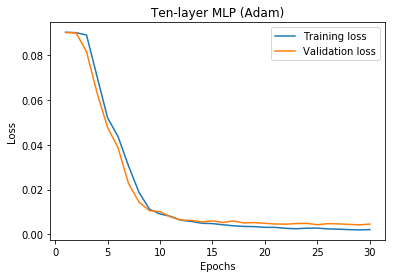

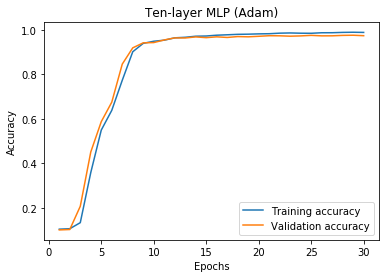

In [11]:
# Plot of Losses
history_dict_2 = history_2.history
loss_values_2 = history_dict_2['loss']
val_loss_values_2 = history_dict_2['val_loss']
acc_values_2 = history_dict_2['acc']
val_acc_values_2 = history_dict_2['val_acc']

epochs_index = range(1,len(loss_values_2)+1)
fig_loss_2 = plt.figure()
plt.plot(epochs_index, loss_values_2, label='Training loss')
plt.plot(epochs_index, val_loss_values_2, label='Validation loss')
plt.title('Ten-layer MLP (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


# Plot of Accuracies
fig_accuracy_2 = plt.figure()
plt.plot(epochs_index,acc_values_2, label='Training accuracy')
plt.plot(epochs_index,val_acc_values_2, label='Validation accuracy')
plt.title('Ten-layer MLP (Adam)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Save the Plots

In [12]:
#fig_accuracy_2.savefig('fig_accuracy_2.eps', format='eps', dpi=2000)
#fig_accuracy_2.savefig('fig_accuracy_2.pdf', format='pdf', dpi=2000)